In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression

In [3]:
data = pd.read_csv('diabetes_dataset.csv')
test = pd.read_csv('diabetes_app.csv')
cols = sorted(list(test.columns))

### Fill not assigned values with mean

In [4]:
#for col in cols:
#    mean = data[col].mean()
#    data[col].fillna(mean, inplace=True)

## Boxplot

In [5]:
#for col in cols:
#    df = pd.DataFrame(columns = ['Data', 'Test'])
#    df['Data'], df['Test'] = data[col], test[col]
#
#    df.boxplot(figsize=(12,4))
#    plt.suptitle(col)
#    plt.show()

## Histogram

In [6]:
#for col in cols:
#    df = pd.DataFrame(columns = ['Data', 'Test'])
#    df['Data'], df['Test'] = data[col], test[col]
#
#    df.hist(figsize=(12,4))
#    plt.suptitle(col)
#    plt.show()

In [20]:
def fillna_linear_reg(model, x):
    if np.isnan(x['SkinThickness']):
        try:
            predicted = model.predict([[x['BMI']]])
            x['SkinThickness'] = predicted[0]
        except: pass
    return x

0.4378323088276228
0.20996714193552812


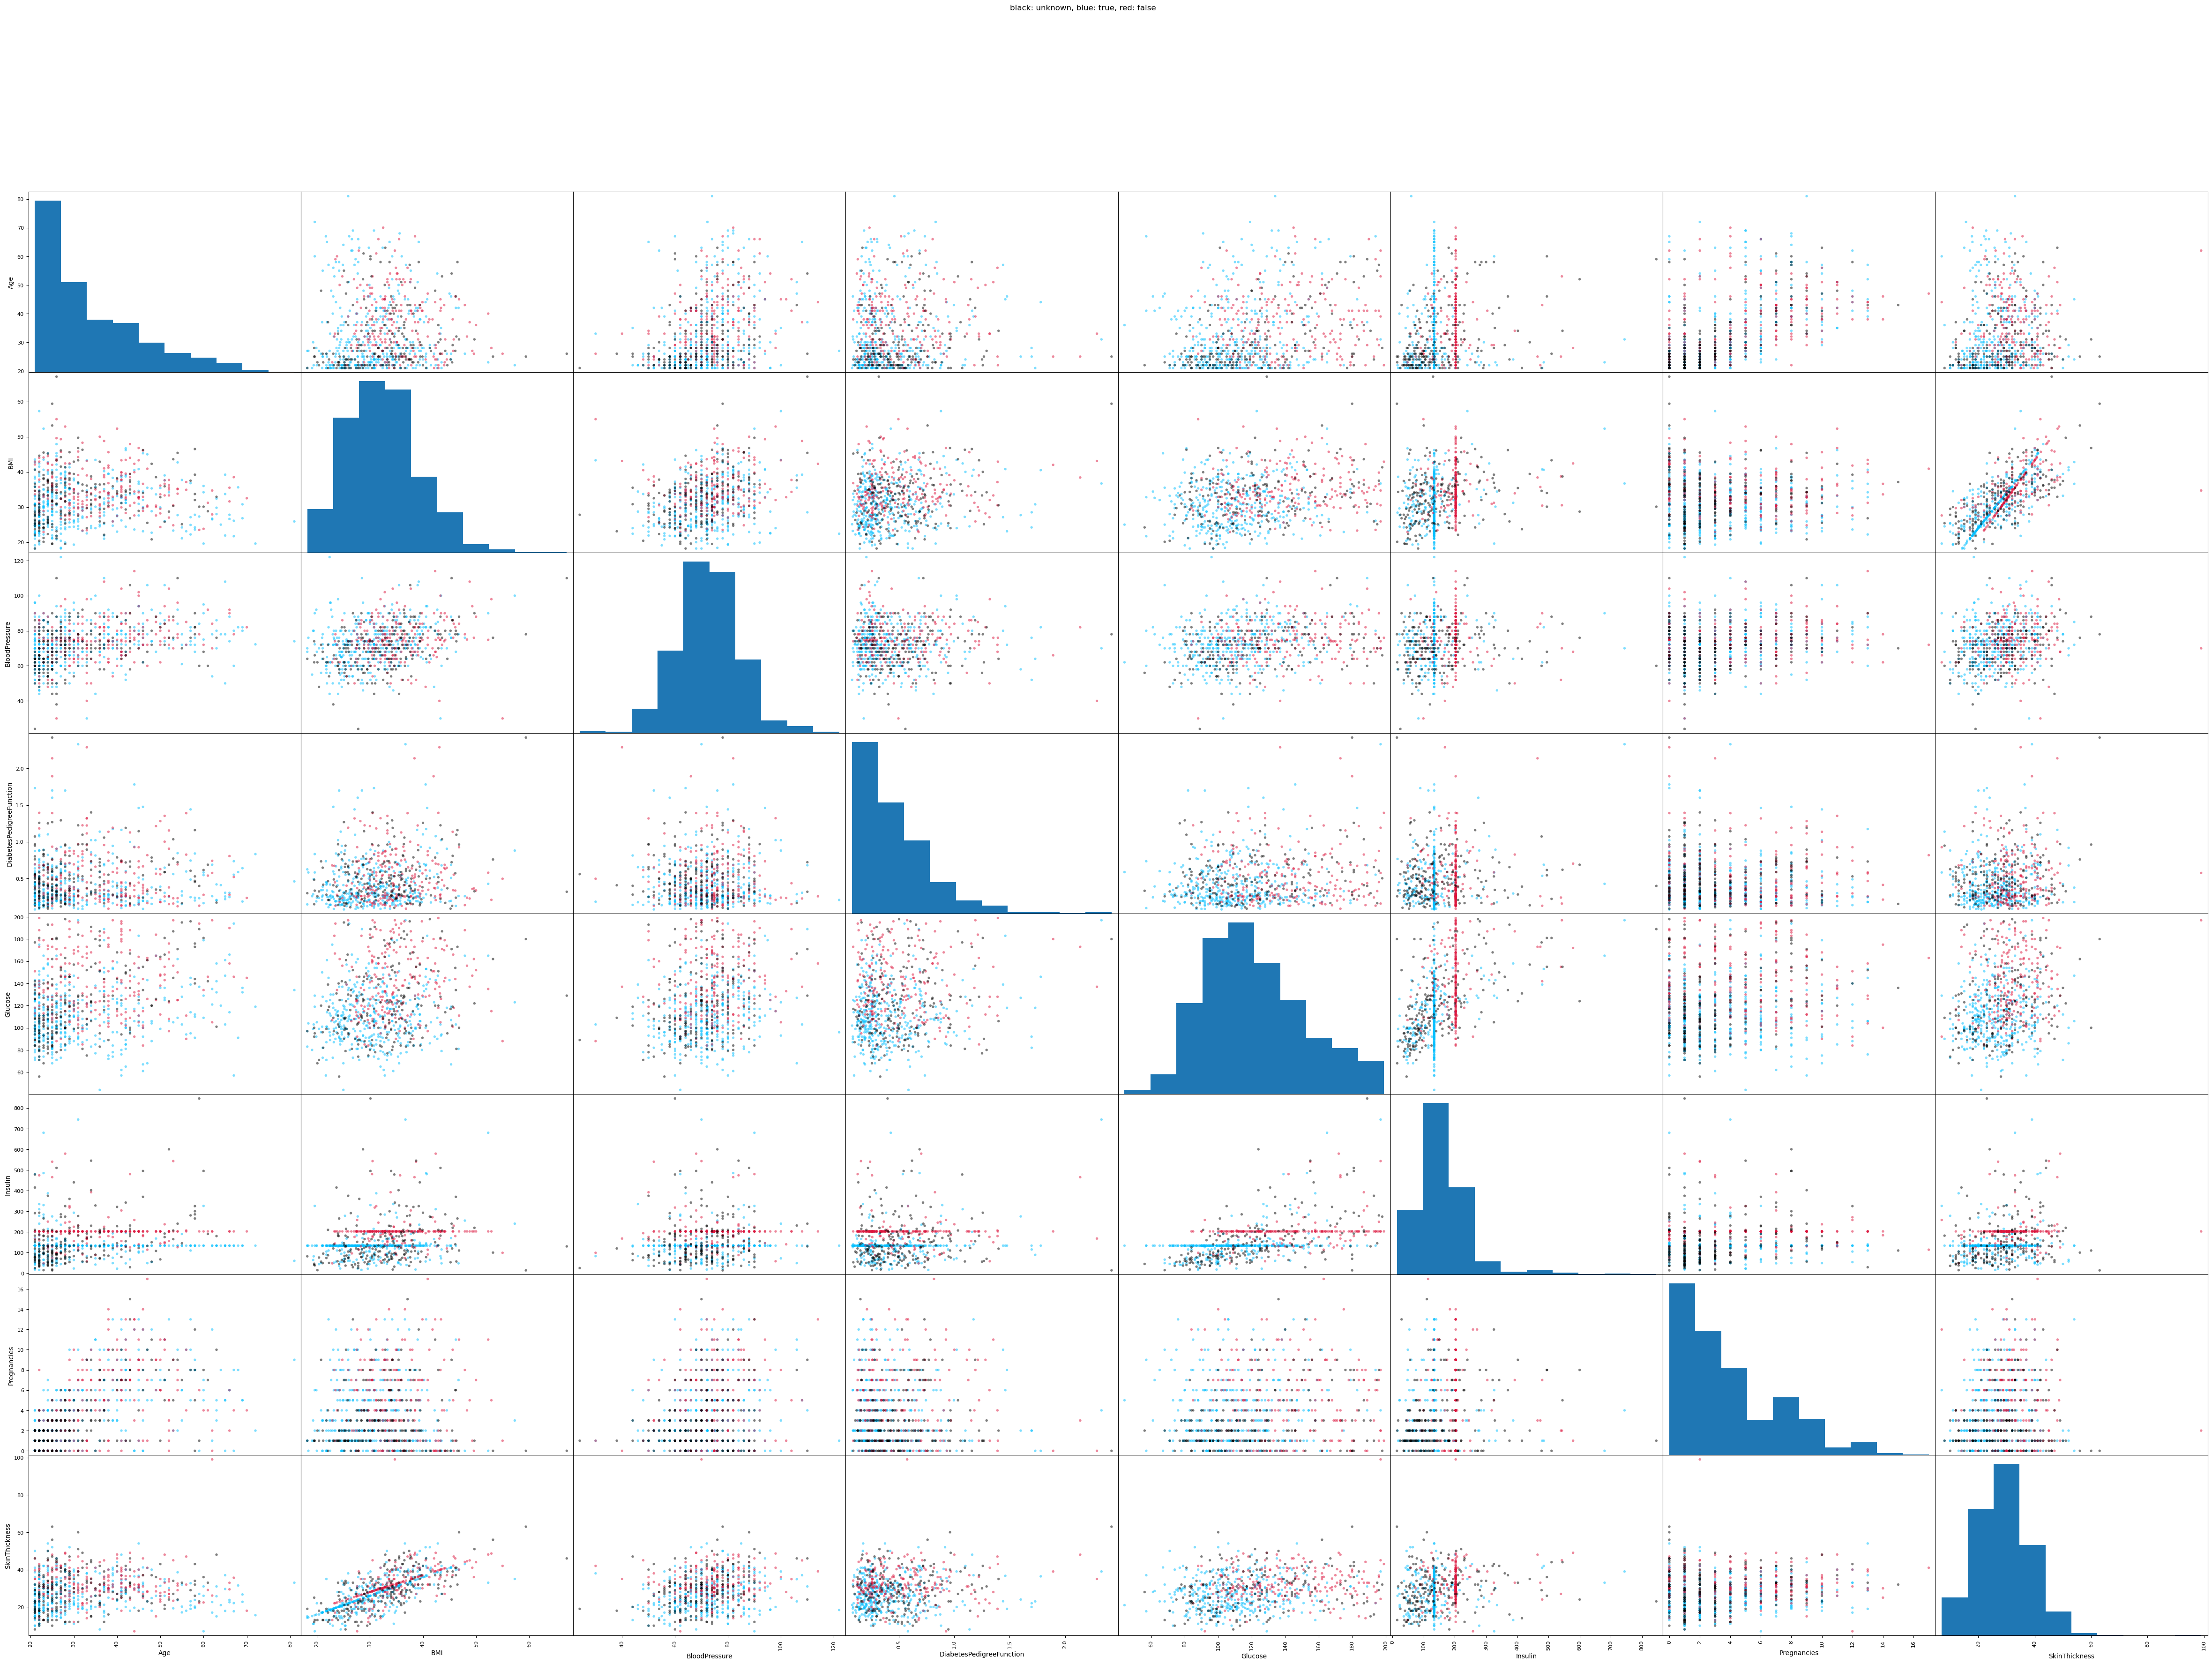

In [24]:
data = pd.read_csv('diabetes_dataset.csv')
test = pd.read_csv('diabetes_app.csv')
cols = sorted(list(test.columns))

options = ['deepskyblue', 'crimson', 'black']

class0, class1 = data[data['Outcome'] == 0].copy(), data[data['Outcome'] == 1].copy()

c0lr = class0[['BMI', 'SkinThickness']].dropna()
model0, x0, st0 = LinearRegression(), c0lr['BMI'].to_numpy().reshape(-1, 1), c0lr['SkinThickness'] #['BMI'].to_numpy().reshape(-1, 1)
model0.fit(x0, st0)
print(model0.score(x0, st0))
for index, row in class0.iterrows():
    class0.loc[index,:] = fillna_linear_reg(model0, row)

c1lr = class1[['BMI', 'SkinThickness']].dropna()
model1, x1, st1 = LinearRegression(), c1lr['BMI'].to_numpy().reshape(-1, 1), c1lr['SkinThickness']
model1.fit(x1, st1)
print(model0.score(x1, st1))
for index, row in class1.iterrows():
    class1.loc[index,:] = fillna_linear_reg(model1, row)

for column in cols:
    c0m, c1m = class0[column].mean(), class1[column].mean()
    class0[column].fillna(value=c0m, inplace=True)
    class1[column].fillna(value=c1m, inplace=True)

data = pd.concat([class0, class1],axis=0)

scatterDf = pd.concat([data, test],axis=0)
scatterDf['Outcome'].fillna(2, inplace=True)

target = scatterDf

classes = [ options[int(x)] for x in target['Outcome']]
scatter = pd.plotting.scatter_matrix(target[cols], s=60, c=classes, figsize=(60,40))
plt.suptitle("black: unknown, blue: true, red: false")
plt.show()


## Normalize the data

In [ ]:
normalized = data.copy()

#z-score normalization
colsToNormalize = sorted(['Glucose', 'BloodPressure', 'BMI', 'DiabetesPedigreeFunction', 'SkinThickness', 'Insulin'])
for column in colsToNormalize:
    normalized[column] = (normalized[column] - normalized[column].mean()) / normalized[column].std()   

#age grouping (0-30, 30-40, 40-50, 50-60, 60+) 
normalized['Age'] = normalized['Age'].apply(lambda x: 0 if x < 30 else 1 if x < 40 else 2 if x < 50 else 3 if x < 60 else 4)

#fill SkinThickness na with linear regression from BMI
filtered = normalized[['BMI', 'SkinThickness']].copy().dropna()
modelB = LinearRegression()
Xb, yb = filtered['BMI'].to_numpy().reshape(-1, 1), filtered['SkinThickness']
modelB.fit(Xb, yb)
print(f'BMI\nscore:{modelB.score(Xb, yb)}\n{modelB.coef_=}\n{modelB.intercept_=}\n\n')

## Normalized histograms

In [ ]:
for col in colsToNormalize:
    normalized[[col,"Outcome"]].hist(by="Outcome",figsize=(12,4))
    plt.suptitle(col)
    plt.show()

## 2D Scatterplot using normalized data

In [ ]:
classes = ['deepskyblue' if x else 'crimson' for x in normalized['Outcome']]

scatterDf = normalized[cols].copy()
for col in cols:
    fillValue = -3
    scatterDf[col].fillna(fillValue, inplace=True)

scatter = pd.plotting.scatter_matrix(scatterDf, c=classes, figsize=(30,20))
plt.suptitle("blue: 1, red: 0")
plt.show()
